<a href="https://colab.research.google.com/github/lenow520/UCI-Beijing-PM2.5/blob/main/preprocesseddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
PRSA=pd.read_csv('/content/drive/My Drive/PRSA_data.csv')
PRSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [ ]:
PRSA['pm2.5'].fillna(PRSA['pm2.5'].mean(),inplace=True)
PRSA

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.000000,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.000000,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.000000,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.000000,-22,-4.0,1034.0,NW,246.72,0,0


In [ ]:
PRSA['cbwd']=PRSA['cbwd'].astype('category')
PRSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   No      43824 non-null  int64   
 1   year    43824 non-null  int64   
 2   month   43824 non-null  int64   
 3   day     43824 non-null  int64   
 4   hour    43824 non-null  int64   
 5   pm2.5   43824 non-null  float64 
 6   DEWP    43824 non-null  int64   
 7   TEMP    43824 non-null  float64 
 8   PRES    43824 non-null  float64 
 9   cbwd    43824 non-null  category
 10  Iws     43824 non-null  float64 
 11  Is      43824 non-null  int64   
 12  Ir      43824 non-null  int64   
dtypes: category(1), float64(4), int64(8)
memory usage: 4.1 MB


In [ ]:
PRSA = PRSA.drop(['No'],axis=1)

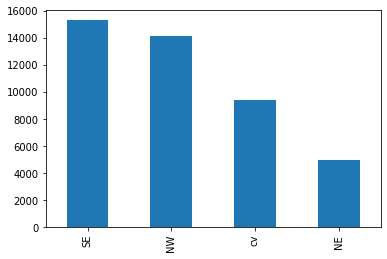

In [ ]:
PRSA['cbwd'].value_counts().plot(kind='bar')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
PRSA['cbwd']=le.fit_transform(PRSA['cbwd'])
PRSA

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,98.613215,-21,-11.0,1021.0,1,1.79,0,0
1,2010,1,1,1,98.613215,-21,-12.0,1020.0,1,4.92,0,0
2,2010,1,1,2,98.613215,-21,-11.0,1019.0,1,6.71,0,0
3,2010,1,1,3,98.613215,-21,-14.0,1019.0,1,9.84,0,0
4,2010,1,1,4,98.613215,-20,-12.0,1018.0,1,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.000000,-23,-2.0,1034.0,1,231.97,0,0
43820,2014,12,31,20,10.000000,-22,-3.0,1034.0,1,237.78,0,0
43821,2014,12,31,21,10.000000,-22,-3.0,1034.0,1,242.70,0,0
43822,2014,12,31,22,8.000000,-22,-4.0,1034.0,1,246.72,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff0912f940>,
      dtype=object)

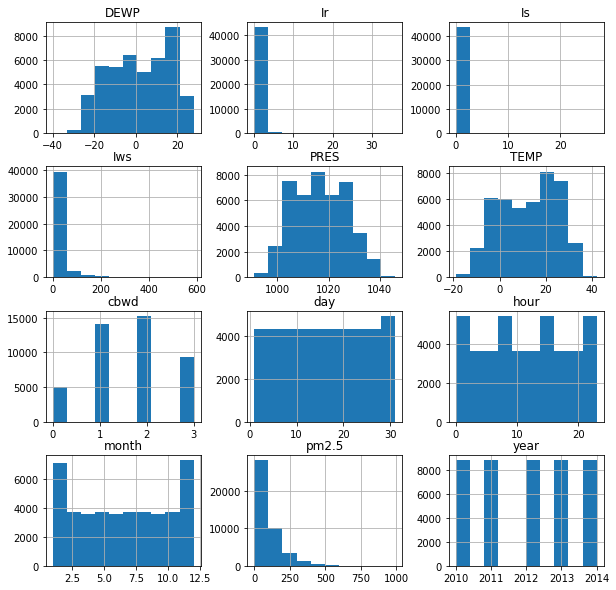

In [ ]:
PRSA.hist(figsize=(10,10))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


               year         month           day  ...       Iws        Is        Ir
year   1.000000e+00 -3.575502e-16 -1.663879e-16  ... -0.064244 -0.017002 -0.024383
month -3.575502e-16  1.000000e+00  1.079604e-02  ...  0.003043 -0.061672  0.036737
day   -1.663879e-16  1.079604e-02  1.000000e+00  ... -0.008954 -0.036826  0.002681
hour   0.000000e+00 -1.528210e-17 -4.046030e-19  ...  0.056618 -0.002374 -0.006286
pm2.5 -1.435446e-02 -2.353263e-02  8.068495e-02  ... -0.239969  0.019263 -0.050224
DEWP   1.121574e-03  2.339746e-01  2.855899e-02  ... -0.296399 -0.034410  0.125090
TEMP   4.552854e-02  1.700926e-01  1.479104e-02  ... -0.154623 -0.092601  0.049121
PRES  -1.257001e-02 -6.218507e-02 -7.070048e-03  ...  0.185355  0.069028 -0.079843
cbwd   3.745945e-02  1.378450e-02  1.494449e-02  ... -0.199964  0.010372 -0.048276
Iws   -6.424368e-02  3.043299e-03 -8.953566e-03  ...  1.000000  0.021883 -0.010122
Is    -1.700207e-02 -6.167206e-02 -3.682638e-02  ...  0.021883  1.000000 -0.009548
Ir  

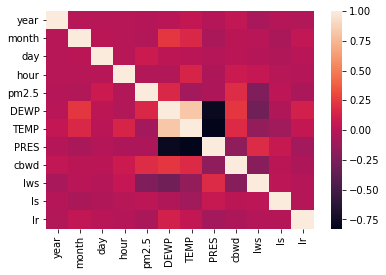

In [ ]:
import seaborn as sns
#Correlations between numeric features
cor=PRSA.corr()
print(cor)
#Plot heatmap
sns.heatmap(cor)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff04251390>]],
      dtype=object)

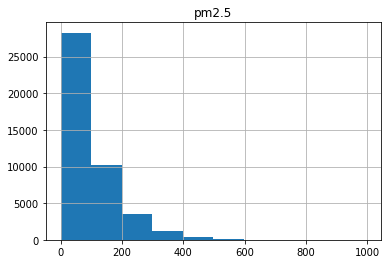

In [ ]:
PRSA.hist(column='pm2.5')

In [ ]:
bins = [-1, 35, 75, 115, 150, 250, 994]

x25 = pd.cut(PRSA['pm2.5'], bins,labels=['excellent', 'good', 'light', 'moderate','heavy', 'severe']) 
print(pd.value_counts(x25))

excellent    12120
good          9391
light         9189
heavy         5938
moderate      4133
severe        3053
Name: pm2.5, dtype: int64


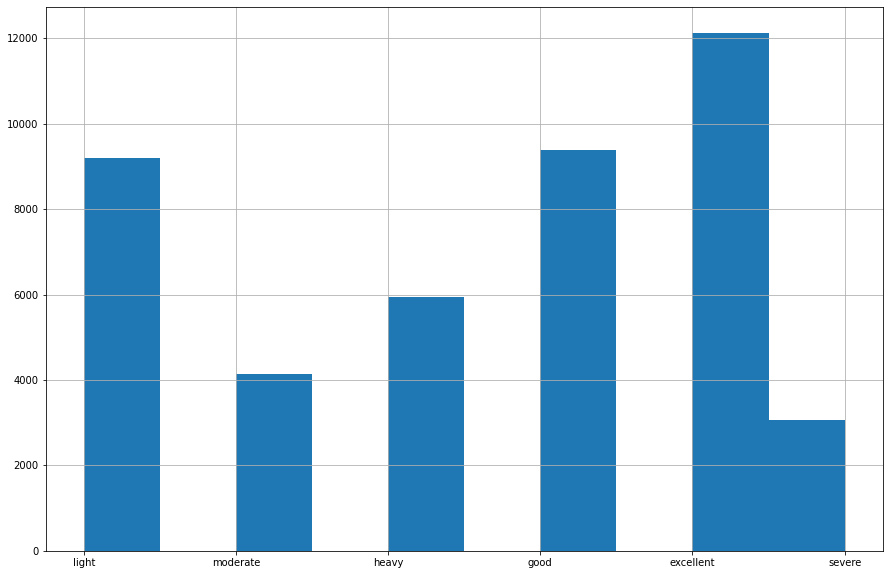

In [ ]:
x25.hist(figsize=(15,10))

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
features = ['year','month','day','hour','DEWP','TEMP','PRES','cbwd','Iws','Is','Ir']
# Separating out the features
x = PRSA.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
model = pca.fit_transform(x)
df = pd.DataFrame(data = model, columns = ['pc1','pc2','pc3','pc4','pc5'])
pcaPRSA = pd.concat([df, x25], axis = 1)
pcaPRSA

,pc1,pc2,pc3,pc4,pc5,pm2.5
0,2.598846,-0.285351,1.311834,1.831254,-0.128347,light
1,2.597481,-0.261059,1.174145,1.819382,-0.127197,light
2,2.501010,-0.233274,1.023517,1.808456,-0.131548,light
3,2.640743,-0.232071,0.913658,1.787180,-0.123383,light
4,2.466917,-0.179059,0.746513,1.781178,-0.132565,light
...,...,...,...,...,...,...
43819,3.159105,2.133706,-1.899996,-2.441212,-0.355178,excellent
43820,3.182369,2.181305,-2.048795,-2.458122,-0.358060,excellent
43821,3.195392,2.224468,-2.208220,-2.479927,-0.364698,excellent
43822,3.249379,2.250713,-2.348715,-2.501401,-0.365879,excellent


In [ ]:
from sklearn.preprocessing import StandardScaler
col_names=['DEWP','TEMP','PRES','Iws','Is','Ir']
scaler=StandardScaler().fit(PRSA[col_names].values)
PRSA[col_names]=scaler.transform(PRSA[col_names].values)
PRSA

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,98.613215,-1.580878,-1.922250,0.443328,1,-0.441894,-0.069353,-0.137667
1,2010,1,1,1,98.613215,-1.580878,-2.004228,0.345943,1,-0.379306,-0.069353,-0.137667
2,2010,1,1,2,98.613215,-1.580878,-1.922250,0.248559,1,-0.343514,-0.069353,-0.137667
3,2010,1,1,3,98.613215,-1.580878,-2.168183,0.248559,1,-0.280926,-0.069353,-0.137667
4,2010,1,1,4,98.613215,-1.511594,-2.004228,0.151174,1,-0.218339,-0.069353,-0.137667
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.000000,-1.719447,-1.184453,1.709325,1,4.160780,-0.069353,-0.137667
43820,2014,12,31,20,10.000000,-1.650162,-1.266431,1.709325,1,4.276956,-0.069353,-0.137667
43821,2014,12,31,21,10.000000,-1.650162,-1.266431,1.709325,1,4.375337,-0.069353,-0.137667
43822,2014,12,31,22,8.000000,-1.650162,-1.348408,1.709325,1,4.455720,-0.069353,-0.137667


In [ ]:
from sklearn.preprocessing import Normalizer
col_names=['pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']
features=PRSA[col_names]
normalizer=Normalizer(norm='max')
features=normalizer.transform(features.values)
PRSA[col_names]=features
PRSA

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,1.0,-0.016031,-0.019493,0.004496,1,-0.004481,-0.000703,-0.001396
1,2010,1,1,1,1.0,-0.016031,-0.020324,0.003508,1,-0.003846,-0.000703,-0.001396
2,2010,1,1,2,1.0,-0.016031,-0.019493,0.002521,1,-0.003483,-0.000703,-0.001396
3,2010,1,1,3,1.0,-0.016031,-0.021987,0.002521,1,-0.002849,-0.000703,-0.001396
4,2010,1,1,4,1.0,-0.015329,-0.020324,0.001533,1,-0.002214,-0.000703,-0.001396
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,1.0,-0.214931,-0.148057,0.213666,1,0.520097,-0.008669,-0.017208
43820,2014,12,31,20,1.0,-0.165016,-0.126643,0.170933,1,0.427696,-0.006935,-0.013767
43821,2014,12,31,21,1.0,-0.165016,-0.126643,0.170933,1,0.437534,-0.006935,-0.013767
43822,2014,12,31,22,1.0,-0.206270,-0.168551,0.213666,1,0.556965,-0.008669,-0.017208


In [ ]:
x25.isnull().sum()

0

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#split data into train and test sets
X=PRSA.drop(['pm2.5'],axis=1)
y=x25
X_new=SelectKBest(f_classif,k=5).fit_transform(X,y)
print(X_new.shape)
print(X_new)

(43824, 5)
[[-1.60310958e-02  4.49562107e-03  1.00000000e+00 -4.48108144e-03
  -7.03282953e-04]
 [-1.60310958e-02  3.50808161e-03  1.00000000e+00 -3.84640582e-03
  -7.03282953e-04]
 [-1.60310958e-02  2.52054215e-03  1.00000000e+00 -3.48344437e-03
  -7.03282953e-04]
 ...
 [-1.65016223e-01  1.70932538e-01  1.00000000e+00  4.37533654e-01
  -6.93529928e-03]
 [-2.06270279e-01  2.13665672e-01  1.00000000e+00  5.56965044e-01
  -8.66912409e-03]
 [-1.31739824e-01  1.42443781e-01  1.00000000e+00  3.76525646e-01
  -5.77941606e-03]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
#split data into train and test sets
X=PRSA.drop(['pm2.5'],axis=1)
y=x25

clf=ExtraTreesClassifier()
clf=clf.fit(X,y) #fit model
clf.feature_importances_ #important value for each attributes

array([0.01934265, 0.04063099, 0.03254844, 0.02421513, 0.13046185,
       0.10043217, 0.09011319, 0.03608019, 0.14232959, 0.23916115,
       0.14468466])

In [ ]:
from sklearn.feature_selection import SelectFromModel
model=SelectFromModel(clf,prefit=True)
X_new=model.transform(X)
print(X_new.shape)
print(X_new)

(43824, 5)
[[-0.0160311  -0.01949283 -0.00448108 -0.00070328 -0.00139603]
 [-0.0160311  -0.02032413 -0.00384641 -0.00070328 -0.00139603]
 [-0.0160311  -0.01949283 -0.00348344 -0.00070328 -0.00139603]
 ...
 [-0.16501622 -0.12664307  0.43753365 -0.0069353  -0.01376671]
 [-0.20627028 -0.16855102  0.55696504 -0.00866912 -0.01720839]
 [-0.13173982 -0.10553589  0.37652565 -0.00577942 -0.01147226]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#split data into train and test sets
X=PRSA.drop(['pm2.5'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
list1=[X_train,X_test,y_train,y_test]
print(list1)

[       year  month  day  hour  ...  cbwd       Iws        Is        Ir
36709  2014      3   10    13  ...     2 -0.004464 -0.000701 -0.001391
14327  2011      8   20    23  ...     2 -0.007753 -0.001217 -0.002415
18119  2012      1   25    23  ...     3 -0.002948 -0.000445 -0.000882
15430  2011     10    5    22  ...     0 -0.004029 -0.000703 -0.001396
23970  2012      9   25    18  ...     0 -0.019963 -0.003650  0.104274
...     ...    ...  ...   ...  ...   ...       ...       ...       ...
16304  2011     11   11     8  ...     1 -0.004070 -0.000680 -0.001350
79     2010      1    4     7  ...     1  0.034380 -0.002391 -0.004747
12119  2011      5   20    23  ...     2 -0.007094 -0.002569 -0.005099
14147  2011      8   13    11  ...     2  0.000431 -0.000506 -0.001005
38408  2014      5   20     8  ...     0 -0.002838 -0.001926 -0.003824

[35059 rows x 11 columns],        year  month  day  hour  ...  cbwd       Iws        Is        Ir
39812  2014      7   17    20  ...     3 -0.0025